In [36]:
#Import dependencies
import path
import glob
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [37]:
#Loop thru CSV files for parking violations, and add to DataFrame
parking_list_ = []
moving_list_ = []

parking_path = 'ParkingViolation'
moving_path = 'Moving_Violations_2018'

moving_allFiles = glob.glob(moving_path + "/*.csv")
parking_allFiles = glob.glob(parking_path + "/*.csv")

for parking_file_ in parking_allFiles:
    df = pd.read_csv(parking_file_,index_col=None, header=0)
    parking_list_.append(df)
    
for moving_file_ in moving_allFiles:
   df = pd.read_csv(moving_file_,index_col=None, header=0)
   moving_list_.append(df)

parking_frame = pd.concat(parking_list_, axis = 0, ignore_index = True)
moving_df = pd.concat(moving_list_, axis = 0, ignore_index = True)

/Users/hannah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [39]:
#List column names
parking_frame.columns

Index(['X', 'Y', 'OBJECTID', 'ROWID_', 'DAY_OF_WEEK', 'HOLIDAY',
       'WEEK_OF_YEAR', 'MONTH_OF_YEAR', 'ISSUE_TIME', 'VIOLATION_CODE',
       'VIOLATION_DESCRIPTION', 'LOCATION', 'RP_PLATE_STATE', 'BODY_STYLE',
       'ADDRESS_ID', 'STREETSEGID', 'XCOORD', 'YCOORD', 'TICKET_ISSUE_DATE'],
      dtype='object')

In [40]:
#List column names
moving_df.columns

Index(['ACCIDENTINDICATOR', 'ADDRESS_ID', 'AGENCYID', 'FINEAMT', 'LOCATION',
       'OBJECTID', 'PENALTY1', 'PENALTY2', 'ROW_', 'ROW_ID', 'STREETSEGID',
       'TICKETISSUEDATE', 'TICKETTYPE', 'TOTALPAID', 'VIOLATIONCODE',
       'VIOLATIONDESC', 'XCOORD', 'YCOORD'],
      dtype='object')

In [41]:
#Re-create frame with columns of interest
parking_frame = parking_frame[['X', 'Y', 'VIOLATION_CODE', 'VIOLATION_DESCRIPTION', 'LOCATION', 'RP_PLATE_STATE', 'TICKET_ISSUE_DATE']]
moving_df = moving_df[['XCOORD', 'YCOORD', 'VIOLATIONCODE', 'VIOLATIONDESC', 'LOCATION', 'TICKETISSUEDATE', 'TICKETTYPE']]

In [42]:
#Set index to date, and add date column
parking_frame = parking_frame.set_index(pd.DatetimeIndex(parking_frame['TICKET_ISSUE_DATE']))

parking_frame['Date'] = parking_frame.index.date

parking_frame.head()

,X,Y,VIOLATION_CODE,VIOLATION_DESCRIPTION,LOCATION,RP_PLATE_STATE,TICKET_ISSUE_DATE,Date
TICKET_ISSUE_DATE,,,,,,,,
2018-11-01 20:20:00,-77.009498,38.872980,P055,NO PARKING ANYTIME,UNIT BLOCK O ST SW EAST SIDE,DC,2018-11-01T20:20:00.000Z,2018-11-01
2018-11-30 14:16:00,-77.033642,38.901937,P039,PARK AT EXPIRED METER,900 BLOCK 15TH ST NW WEST SIDE,MD,2018-11-30T14:16:00.000Z,2018-11-30
2018-11-30 23:35:00,-77.027043,38.918658,P007,PARK IN A BUS ZONE,2200 BLOCK 11TH ST NW WEST SIDE,MD,2018-11-30T23:35:00.000Z,2018-11-30
2018-11-30 23:36:00,-77.027043,38.918658,P170,FAILURE TO DISPLAY CURRENT TAGS,2200 BLOCK 11TH ST NW WEST SIDE,MD,2018-11-30T23:36:00.000Z,2018-11-30
2018-11-21 15:43:00,-77.038498,38.906106,P025,PARK LESS THAN 40 FEET FROM AN INTERSECTION,1200 BLOCK 17TH ST NW WEST SIDE,MO,2018-11-21T15:43:00.000Z,2018-11-21


In [43]:
#Set index to date, and add date column
moving_df = moving_df.set_index(pd.DatetimeIndex(moving_df['TICKETISSUEDATE']))

moving_df['Date'] = moving_df.index.date

moving_df.head()

,XCOORD,YCOORD,VIOLATIONCODE,VIOLATIONDESC,LOCATION,TICKETISSUEDATE,TICKETTYPE,Date
TICKETISSUEDATE,,,,,,,,
2018-11-02 11:13:00,404133.5400,132428.0100,T119,SPEED 11-15 MPH OVER THE SPEED LIMIT,3700 BLK SOUTHERN AVE SE SW/B,2018-11-02T11:13:00.000Z,Moving,2018-11-02
2018-11-12 07:15:00,398788.1561,136798.6603,T119,SPEED 11-15 MPH OVER THE SPEED LIMIT,3RD ST TUNNEL NW N/B BY MA AVE,2018-11-12T07:15:00.000Z,Moving,2018-11-12
2018-11-10 09:22:00,397102.6300,142844.3000,T119,SPEED 11-15 MPH OVER THE SPEED LIMIT,5200 BLK 14TH ST NW S/B,2018-11-10T09:22:00.000Z,Moving,2018-11-10
2018-11-16 10:10:00,395664.9200,137186.8900,T119,SPEED 11-15 MPH OVER THE SPEED LIMIT,2200 BLOCK K ST NW E/B,2018-11-16T10:10:00.000Z,Moving,2018-11-16
2018-11-16 10:15:00,395664.9200,137186.8900,T119,SPEED 11-15 MPH OVER THE SPEED LIMIT,2200 BLK K ST NW W/B,2018-11-16T10:15:00.000Z,Moving,2018-11-16


In [44]:
#Import weather CSV

file = 'WeatherData.csv'

weather_frame = pd.read_csv(file, index_col=0, parse_dates=True)

weather_frame = weather_frame.dropna(axis=1, how='any')

weather_frame = weather_frame.groupby(weather_frame['dt_iso']).first()

weather_frame.reset_index(inplace=True)

weather_frame.head()

,dt_iso,city_id,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2018-01-01 00:00:00 +0000 UTC,4366164,265.32,263.15,267.15,1029,48,2,240,1,800,Clear,sky is clear,01n
1,2018-01-01 01:00:00 +0000 UTC,4366164,264.10,261.15,266.15,1029,52,2,230,1,800,Clear,sky is clear,01n
2,2018-01-01 02:00:00 +0000 UTC,4366164,263.82,261.15,266.15,1030,52,3,230,1,800,Clear,sky is clear,01n
3,2018-01-01 03:00:00 +0000 UTC,4366164,263.38,260.15,265.15,1030,52,2,230,1,800,Clear,sky is clear,01n
4,2018-01-01 04:00:00 +0000 UTC,4366164,263.20,260.15,265.15,1030,52,1,230,1,800,Clear,sky is clear,01n


In [45]:
#Convert UTC time to datetime format
weather_frame['dt_iso'] = pd.to_datetime(weather_frame['dt_iso'], format='%Y-%m-%d %H:%M:%S +0000 %Z')

#Re-create frame with columns of interest
weather_frame = weather_frame[['dt_iso', 'temp','weather_id', 'weather_main']]

#Create new column for precipitation
weather_frame['precipitation'] = weather_frame['weather_id']
weather_frame['precipitation'] = weather_frame['precipitation'].astype(float)

weather_frame.head()

,dt_iso,temp,weather_id,weather_main,precipitation
0,2018-01-01 00:00:00,265.32,800,Clear,800.0
1,2018-01-01 01:00:00,264.10,800,Clear,800.0
2,2018-01-01 02:00:00,263.82,800,Clear,800.0
3,2018-01-01 03:00:00,263.38,800,Clear,800.0
4,2018-01-01 04:00:00,263.20,800,Clear,800.0


In [46]:
#Convert precipitation codes to numerical values - information from Open Weather e-mail

for i,row in weather_frame.iterrows():
    if row['weather_id'] == 500:
        weather_frame.at[i,'precipitation'] = 0.5
    elif row['weather_id'] == 501:
        weather_frame.at[i, 'precipitation'] = 1.5
    elif row['weather_id'] == 502:
        weather_frame.at[i, 'precipitation'] = 10
    elif row['weather_id'] == 503:
        weather_frame.at[i, 'precipitation'] = 33
    elif row['weather_id'] == 504:
        weather_frame.at[i, 'precipitation'] = 50
    elif row['weather_id'] == 600:
        weather_frame.at[i, 'precipitation'] = 0.5
    elif row['weather_id'] == 601:
        weather_frame.at[i, 'precipitation'] = 2.75
    elif row['weather_id'] == 602:
        weather_frame.at[i, 'precipitation'] = 5
    else:
        weather_frame.at[i, 'precipitation'] = 0

weather_frame.head()

,dt_iso,temp,weather_id,weather_main,precipitation
0,2018-01-01 00:00:00,265.32,800,Clear,0.0
1,2018-01-01 01:00:00,264.10,800,Clear,0.0
2,2018-01-01 02:00:00,263.82,800,Clear,0.0
3,2018-01-01 03:00:00,263.38,800,Clear,0.0
4,2018-01-01 04:00:00,263.20,800,Clear,0.0


In [47]:
#Set index to date, and add date column
weather_frame = weather_frame.set_index(pd.DatetimeIndex(weather_frame['dt_iso']))

weather_frame['Date'] = weather_frame.index.date

weather_frame.head()

,dt_iso,temp,weather_id,weather_main,precipitation,Date
dt_iso,,,,,,
2018-01-01 00:00:00,2018-01-01 00:00:00,265.32,800,Clear,0.0,2018-01-01
2018-01-01 01:00:00,2018-01-01 01:00:00,264.10,800,Clear,0.0,2018-01-01
2018-01-01 02:00:00,2018-01-01 02:00:00,263.82,800,Clear,0.0,2018-01-01
2018-01-01 03:00:00,2018-01-01 03:00:00,263.38,800,Clear,0.0,2018-01-01
2018-01-01 04:00:00,2018-01-01 04:00:00,263.20,800,Clear,0.0,2018-01-01


In [48]:
#Merge parking DF and weather DF

parking_weather_df = pd.merge(parking_frame, weather_frame, on='Date', how='left')
#parking_weather_df.head()
print(len(parking_weather_df))

32663871


In [49]:
#Merge moving DF and weather DF

moving_weather_df = pd.merge(moving_df, weather_frame, on='Date', how='left')
#moving_weather_df.head()
print(len(moving_weather_df))

30250035


In [50]:
#Create new DataFrame with date, precipitation and count for parking and moving violations
precip_date = weather_frame.groupby('Date')['precipitation'].sum()
parking_date = parking_frame.groupby('Date')['VIOLATION_CODE'].count()
moving_date = moving_df.groupby('Date')['VIOLATIONCODE'].count()
parking_moving_weather_df = pd.DataFrame({'Daily Precipitation': precip_date, 'Total Parking Violations': parking_date,
                                         'Total Moving Violations': moving_date})
parking_moving_weather_df.reset_index()
parking_moving_weather_df.head()

,Daily Precipitation,Total Parking Violations,Total Moving Violations
Date,,,
2018-01-01,0.00,124,4217
2018-01-02,0.50,2374,2387
2018-01-03,0.00,3864,1912
2018-01-04,15.25,2069,1569
2018-01-05,0.00,2452,2111


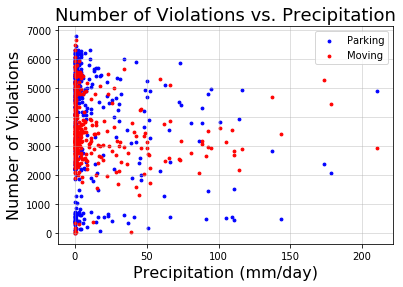

In [51]:
#Create scatter plot to show relationship between precipitation, parking and moving violations
parking_precip_plt = plt.scatter(precip_date, parking_date, color = 'blue', s = 8, label = 'Parking')
moving_precip_plt = plt.scatter(precip_date, moving_date, color = 'red', s = 8, label = 'Moving')

plt.title('Number of Violations vs. Precipitation', fontsize = 18)
plt.xlabel('Precipitation (mm/day)', fontsize = 16)
plt.ylabel('Number of Violations', fontsize = 16)
plt.grid(alpha = 0.5)
plt.legend(loc = 'best', prop={'size': 10})

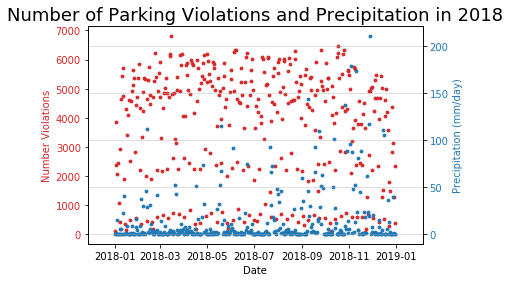

In [52]:
#Create plot to display parking violations and precipitation over 2018
x_axis = parking_moving_weather_df.index

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Number Violations', color=color)
ax1.scatter(x_axis, parking_moving_weather_df['Total Parking Violations'], color=color, s = 8)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Precipitation (mm/day)', color=color)  # we already handled the x-label with ax1
ax2.scatter(x_axis, parking_moving_weather_df['Daily Precipitation'], color=color, s = 8)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Number of Parking Violations and Precipitation in 2018', fontsize = 18)
plt.xlabel('Date', fontsize = 16)
plt.grid(alpha = 0.5)

plt.show()

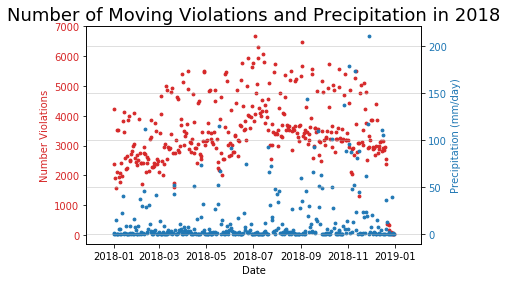

In [53]:
#Create plot to display moving violations and precipitation over 2018
x_axis = parking_moving_weather_df.index

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Number Violations', color=color)
ax1.scatter(x_axis, parking_moving_weather_df['Total Moving Violations'], color=color, s = 8)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Precipitation (mm/day)', color=color)  # we already handled the x-label with ax1
ax2.scatter(x_axis, parking_moving_weather_df['Daily Precipitation'], color=color, s = 8)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Number of Moving Violations and Precipitation in 2018', fontsize = 18)
plt.xlabel('Date', fontsize = 16)
plt.grid(alpha = 0.5)

plt.show()

In [1]:
#Prepare to load Data Frames with SQLAlchemy
from sqlalchemy import create_engine
import pymysql
pymysql.install_as_MySQLdb()

from config import local_parkingmoving_dbname, local_parkingmoving_dbuser

In [2]:
# Create Engine and Pass in MySQL Connection
# Local Connection Backup 
lengine = create_engine(f"mysql://{local_parkingmoving_dbuser}@localhost:3306/{local_parkingmoving_dbname}")

In [3]:
# Create a local database engine connection
lconn = lengine.connect()

In [20]:
# Load parking data to local database
parking_weather_df.to_sql(name='parking_weather', if_exists='append', con=lconn, chunksize=500000, index=False)

In [25]:
#Confirm data loaded to local database
parking_weather_data = pd.read_sql("SELECT * FROM parking_weather", lconn)
print(len(parking_weather_data))
parking_weather_data.head()

32663871


,X,Y,VIOLATION_CODE,VIOLATION_DESCRIPTION,LOCATION,RP_PLATE_STATE,TICKET_ISSUE_DATE,Date,dt_iso,temp,weather_id,weather_main,precipitation
0,-77.009498,38.87298,P055,NO PARKING ANYTIME,UNIT BLOCK O ST SW EAST SIDE,DC,2018-11-01T20:20:00.000Z,2018-11-01,2018-11-01 00:00:00,289.03,800,Clear,0.0
1,-77.009498,38.87298,P055,NO PARKING ANYTIME,UNIT BLOCK O ST SW EAST SIDE,DC,2018-11-01T20:20:00.000Z,2018-11-01,2018-11-01 01:00:00,289.19,800,Clear,0.0
2,-77.009498,38.87298,P055,NO PARKING ANYTIME,UNIT BLOCK O ST SW EAST SIDE,DC,2018-11-01T20:20:00.000Z,2018-11-01,2018-11-01 02:00:00,288.97,800,Clear,0.0
3,-77.009498,38.87298,P055,NO PARKING ANYTIME,UNIT BLOCK O ST SW EAST SIDE,DC,2018-11-01T20:20:00.000Z,2018-11-01,2018-11-01 03:00:00,289.14,800,Clear,0.0
4,-77.009498,38.87298,P055,NO PARKING ANYTIME,UNIT BLOCK O ST SW EAST SIDE,DC,2018-11-01T20:20:00.000Z,2018-11-01,2018-11-01 04:00:00,288.70,800,Clear,0.0


In [61]:
# Load moving data to local database
moving_weather_df.to_sql(name='moving_weather', if_exists='append', con=lconn, chunksize=500000, index=False)

In [59]:
#Load parking, moving and weather data to local database
parking_moving_weather_df.to_sql(name='parking_moving_weather', if_exists='append', con=lconn, index=True)

In [ ]:
# AWS Database Connection
engine = create_engine(f"mysql://{remote_gwsis_dbuser}:{remote_gwsis_dbpwd}@{remote_db_endpoint}:{remote_db_port}/{remote_gwsis_dbname}")